In [42]:
# pip uninstall plotly
# conda uninstall plotly
# conda install -c plotly plotly

* グラフギャラリー  
https://plot.ly/python/  

In [24]:
# 基本ライブラリ
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import numpy.random as rd
import gc
import multiprocessing as mp
import os
import sys
from collections import defaultdict
from glob import glob
import math
from datetime import datetime as dt
from pathlib import Path
import scipy.stats as st
import re
import shutil
from tqdm import tqdm_notebook as tqdm
import datetime
ts_conv = np.vectorize(datetime.datetime.fromtimestamp) # 秒ut(10桁) ⇒ 日付

import pickle
def unpickle(filename):
    with open(filename, 'rb') as fo:
        p = pickle.load(fo)
    return p

def to_pickle(filename, obj):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f, -1)

# pandas settings
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.5f}'.format

# グラフ描画系
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
from matplotlib_venn import venn2, venn2_circles
from matplotlib import animation as ani
from IPython.display import Image

plt.rcParams["patch.force_edgecolor"] = True
#rc('text', usetex=True)
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Basic usage

In [25]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets

In [26]:
# 棒グラフを作成
bar = go.Bar(y=[2, 3, 1])

# レイアウトを決めて
layout = go.Layout(
    title="sample plot",
    legend={"x":0.8, "y":0.1},
    xaxis={"title":"xlabel"},
    yaxis={"title":"ylabel"},
    width=1000,
    height=500,
)

# 図に配置して
fig = go.Figure(data=bar, layout=layout)

# 描画
fig.show()

## Basic chart
https://plot.ly/python/statistical-charts/  
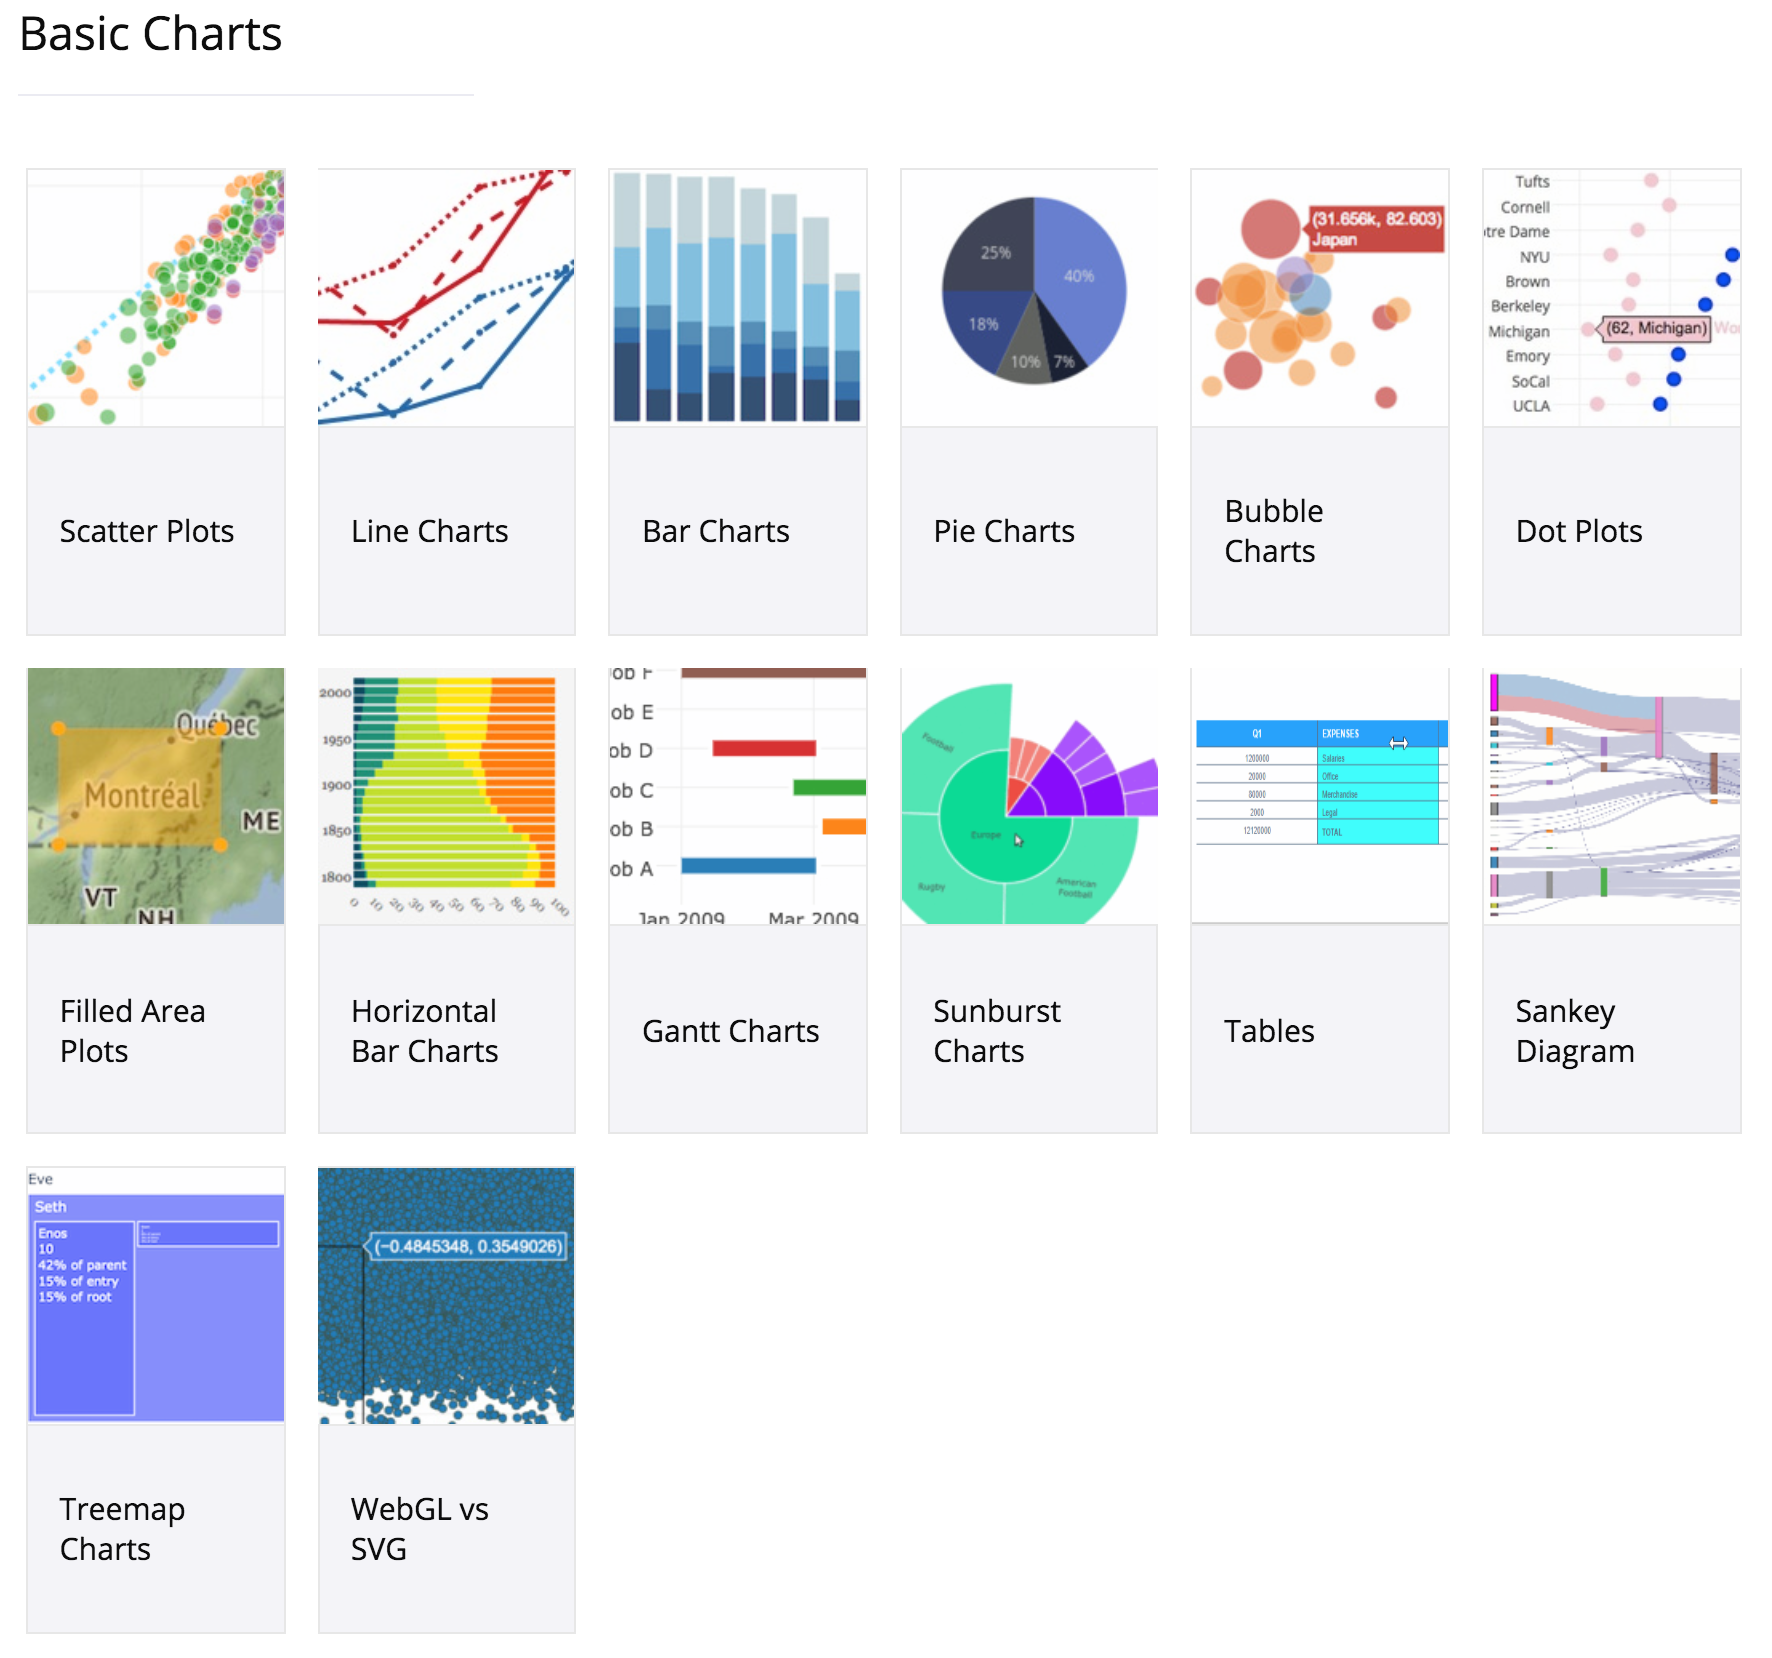  

## Scientific chart
https://plot.ly/python/scientific-charts/  
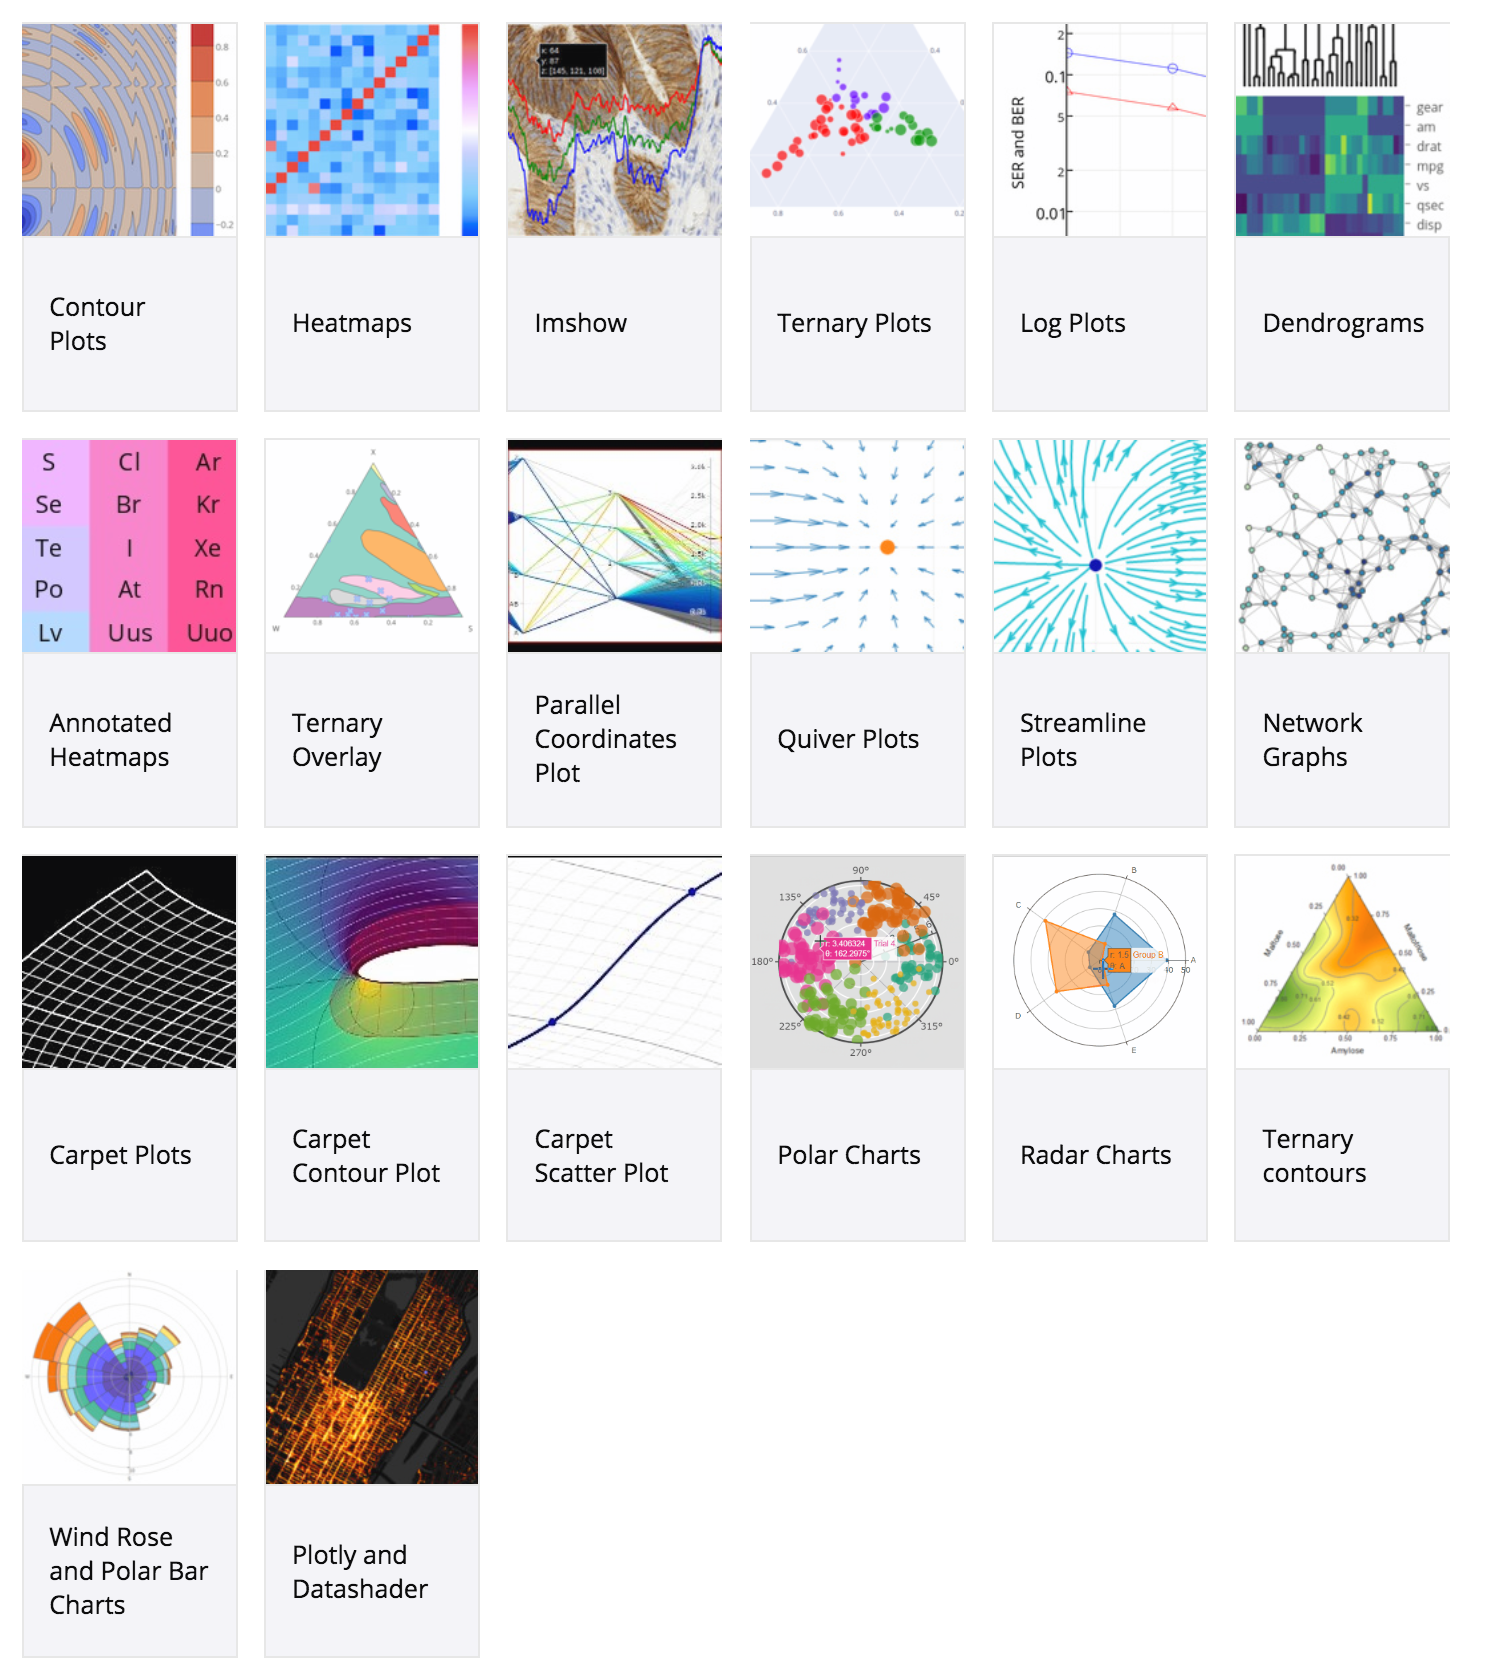  

## Statistic chart
https://plot.ly/python/statistical-charts/  
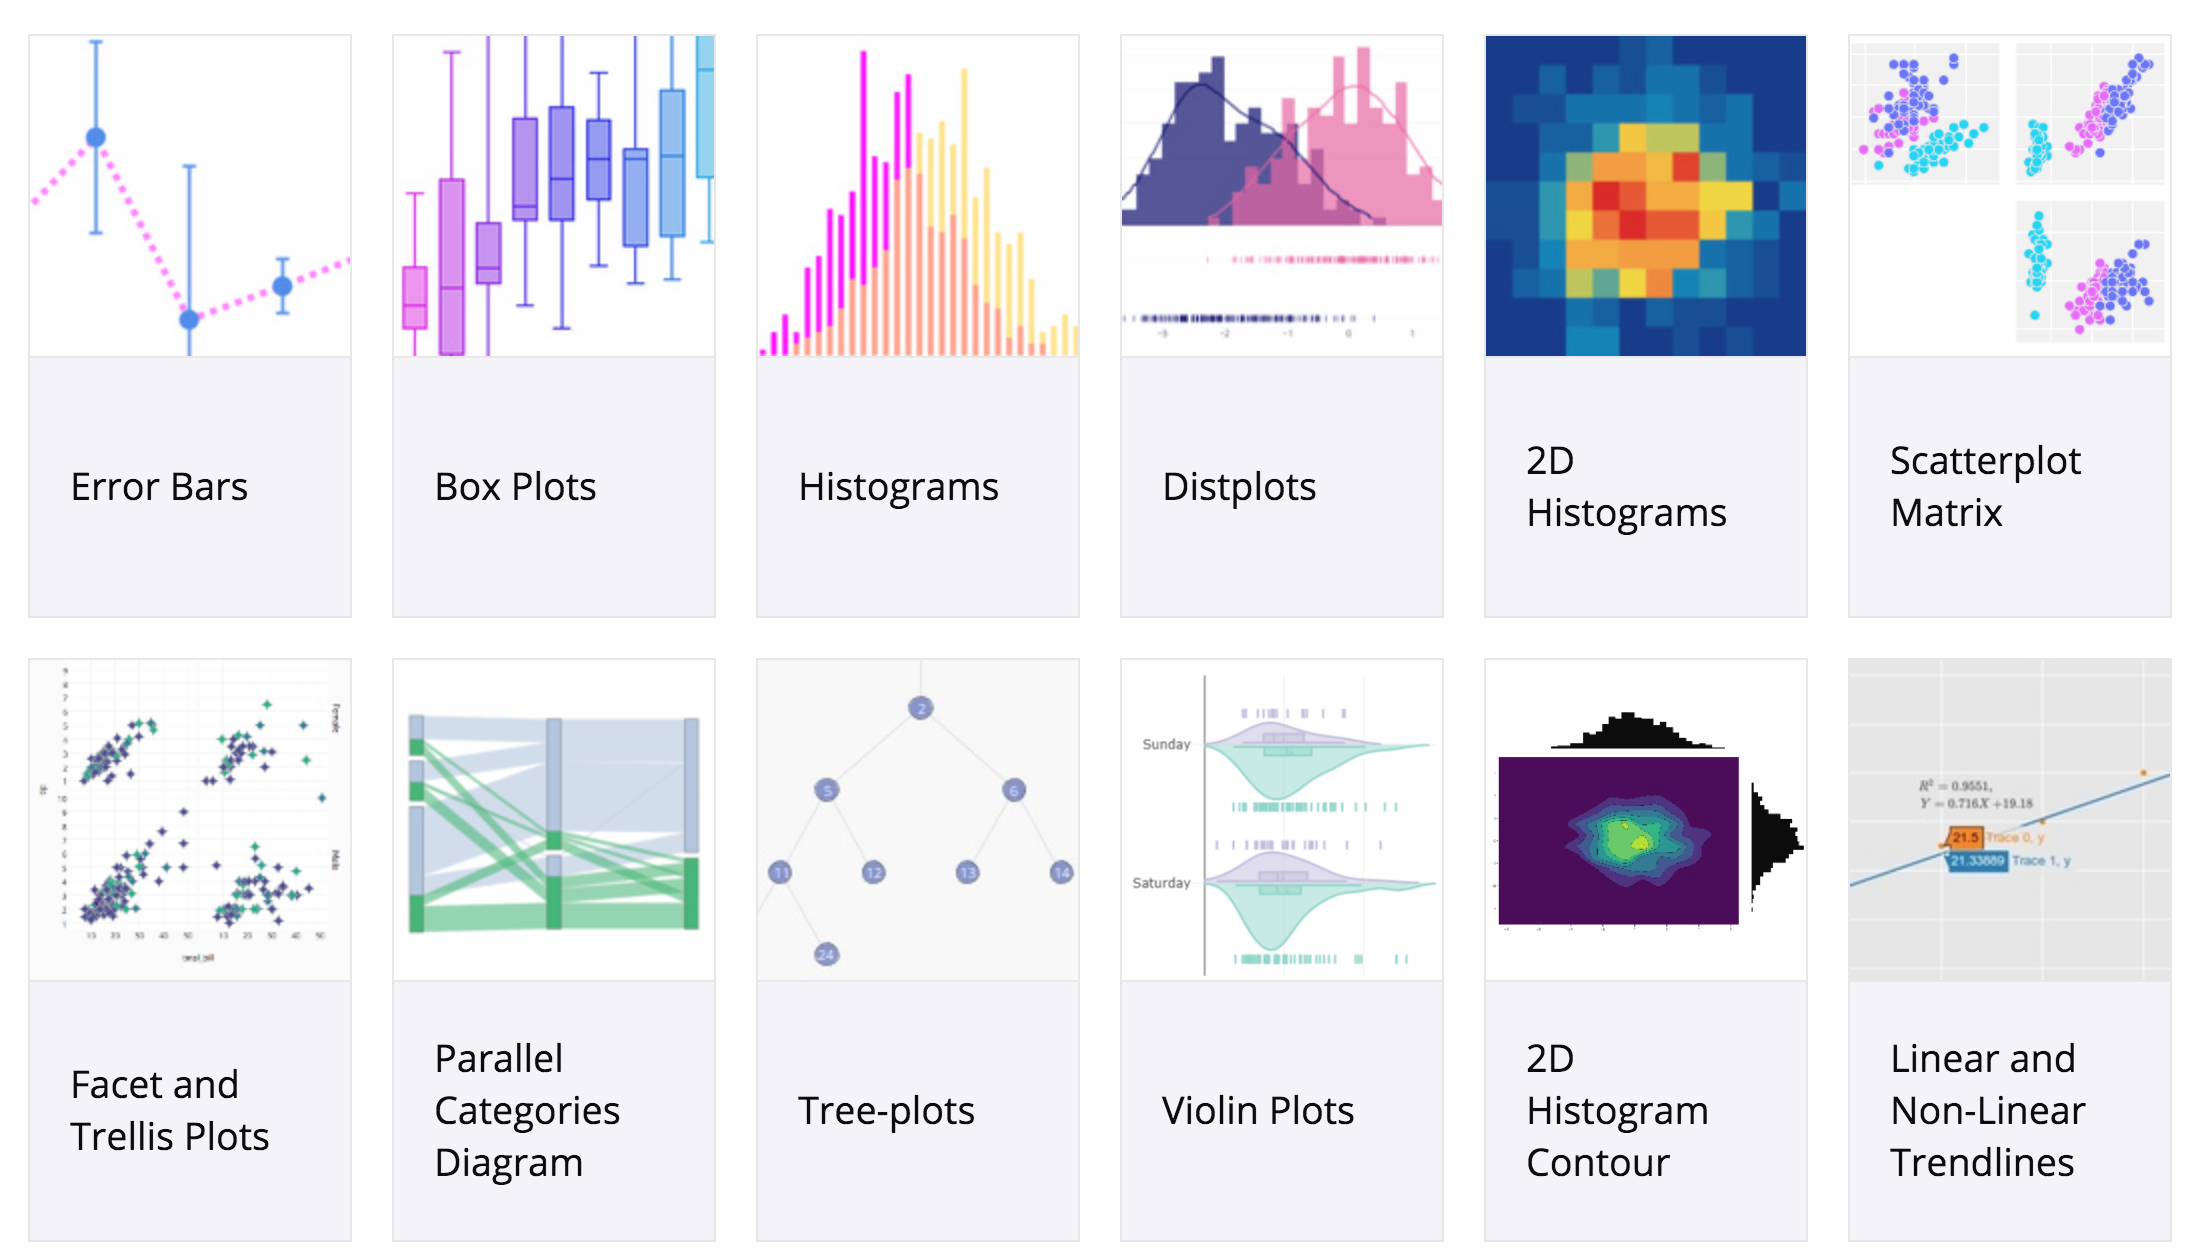

In [27]:
import numpy as np
import plotly.figure_factory as ff
x1,y1 = np.meshgrid(np.arange(0, 2*np.pi, .2), np.arange(0, 2*np.pi, .2))
u1 = np.cos(x1)
v1 = np.sin(x1)

fig = ff.create_quiver(x1, y1, u1, v1)
fig.show()

# Gallery

In [28]:
np.random.seed(71)
n = 300
x = pd.DataFrame(st.multivariate_normal(mean=[0, 0, 0], cov=1).rvs(size=n), 
                 columns=["x1", "x2", "x3"])
x["type"] = np.random.randint(5, size=n)
x["size"] = np.random.randint(10, size=n)

In [29]:
x.head()

x1       x2       x3  type  size
0 -0.43060 -1.19393 -0.44430     1     9
1  0.48941 -0.45156  0.58570     3     1
2  1.17732 -0.96501  0.21828     1     2
3 -0.86614 -0.32301  1.41292     3     7
4 -0.71265 -1.36219 -1.70597     1     1

In [123]:
px.scatter(x, x="x1", y="x2", size="size", color="type",
                 width=1000, height=1000)

In [124]:
px.scatter_3d(x, x="x1", y="x2", z="x3", size="size", color="type",
                 width=1000, height=1000)

In [125]:
x["x1_cumsum"] = x.x1.cumsum()
x["x2_cumsum"] = x.x2.cumsum()
x["x3_cumsum"] = x.x3.cumsum()

In [126]:
x_ = pd.DataFrame(x[["x1_cumsum", "x2_cumsum", "x3_cumsum"]].stack()).reset_index()
x_.columns = ["type", "name", "val"]

In [127]:
fig = px.line(x_, y="val", color="name",)
fig.update_layout(xaxis_range=[0, 300], # datetime.datetimeで指定してもよい
                 xaxis_rangeslider_visible=True)

In [128]:
x

x1       x2       x3  type  size  x1_cumsum  x2_cumsum  x3_cumsum
0   -0.43060 -1.19393 -0.44430     1     9   -0.43060   -1.19393   -0.44430
1    0.48941 -0.45156  0.58570     3     1    0.05881   -1.64549    0.14140
2    1.17732 -0.96501  0.21828     1     2    1.23613   -2.61049    0.35967
3   -0.86614 -0.32301  1.41292     3     7    0.36999   -2.93350    1.77259
4   -0.71265 -1.36219 -1.70597     1     1   -0.34267   -4.29569    0.06663
5    0.55737 -0.07253 -0.19069     3     8    0.21470   -4.36822   -0.12406
6    1.16173 -1.48208 -0.16072     0     4    1.37643   -5.85030   -0.28478
7    0.27450 -0.37374  0.67349     3     6    1.65094   -6.22404    0.38871
8   -0.67930 -0.56868 -0.05264     4     8    0.97164   -6.79271    0.33606
9   -1.12965  0.89177  0.76687     1     9   -0.15801   -5.90095    1.10293
10   1.11575 -1.08832  0.04243     4     7    0.95774   -6.98927    1.14536
11   0.64137  1.57321 -1.95614     4     4    1.59911   -5.41606   -0.81078
12  -0.35375  1.48449  1.00976     3     9    1.24537   -3.93158    0.19898
13   1.07404  0.15996  1.13130     0     7    2.31941   -3.77162    1.33028
14   0.07470 -0.81753  0.70890     4     0    2.39411   -4.58915    2.03918
15  -1.45594 -0.51749 -0.40723     4     7    0.93817   -5.10664    1.63195
16   0.45611 -0.04892 -0.85127     4     9    1.39428   -5.15556    0.78068
17  -0.29861  0.16332  0.94073     4     2    1.09567   -4.99224    1.72141
18   0.39431  0.90066 -1.12954     2     0    1.48998   -4.09159    0.59187
19  -0.52459  0.76310 -0.51546     2     9    0.96540   -3.32848    0.07641
20   0.04219  0.17630 -0.86401     4     7    1.00758   -3.15219   -0.78759
21   1.05178 -0.26717  1.21768     2     3    2.05936   -3.41936    0.43008
22   0.42943 -0.68020  0.58309     2     3    2.48879   -4.09956    1.01317
23   0.56072 -0.44207  0.39053     4     3    3.04951   -4.54163    1.40371
24   0.29733  0.37091  0.23513     4     2    3.34684   -4.17072    1.63884
25   1.55456  1.07992  0.81099     1     5    4.90140   -3.09080    2.44983
26   1.94297  0.41580  0.26476     2     8    6.84437   -2.67499    2.71459
27  -0.46458 -0.19130  0.04124     0     4    6.37979   -2.86629    2.75583
28   0.67598  1.16114  0.26245     0     5    7.05577   -1.70515    3.01828
29  -0.05533 -0.58985 -0.89710     0     4    7.00044   -2.29499    2.12117
30   1.18182 -0.10900 -0.39544     2     8    8.18226   -2.40399    1.72574
31  -0.33769  0.81590  0.61409     4     0    7.84457   -1.58809    2.33982
32   1.20832 -0.55969  0.02929     3     5    9.05289   -2.14778    2.36912
33  -1.68783  1.31627  0.36278     0     5    7.36507   -0.83151    2.73189
34  -0.83216 -2.23564  0.60283     3     2    6.53291   -3.06715    3.33472
35  -0.69105 -0.69507  0.02902     1     2    5.84186   -3.76223    3.36374
36  -1.95816  0.00578 -0.23817     3     0    3.88370   -3.75644    3.12557
37   0.16821  1.21031  0.46551     3     3    4.05192   -2.54614    3.59108
38  -2.01306 -0.67855 -1.52187     4     2    2.03885   -3.22469    2.06922
39  -0.58418 -0.30655  1.53468     3     1    1.45467   -3.53124    3.60389
40   0.32788 -1.11426 -0.53466     1     3    1.78255   -4.64550    3.06923
41  -0.02272  0.00033  0.09357     3     5    1.75982   -4.64517    3.16279
42   1.36640 -0.23466  1.27554     3     8    3.12623   -4.87983    4.43834
43  -1.53739  0.62270 -0.02370     0     3    1.58883   -4.25713    4.41464
44   0.06355 -0.37044  0.18312     2     0    1.65238   -4.62757    4.59776
45   1.08970 -0.92468  1.18644     1     9    2.74209   -5.55225    5.78420
46   2.57318 -2.40969 -1.09333     3     8    5.31527   -7.96194    4.69087
47  -0.94846  0.81989  1.02530     2     7    4.36681   -7.14205    5.71617
48  -0.06270  1.39522 -1.78367     2     6    4.30411   -5.74682    3.93250
49   1.75492 -0.62142  1.19494     3     9    6.05903   -6.36824    5.12744
50   1.72661  0.24882 -0.38036     4     3    7.78564   -6.11942    4.74708
51  -2.27487 -0.12988  1.19873     0     3    5.51077   -6

# 2軸グラフ

In [143]:
data = [
    go.Bar(x=x.index, y=x["x1_cumsum"], name="x1_cumsum"),
    go.Scatter(x=x.index, y=x["x2_cumsum"]*100, name="x2_cumsum Rate", yaxis="y2")
]

layout = go.Layout(
    title="sample plot",
    legend={"x":0.8, "y":0.1},
    xaxis={"title":"index"},
    yaxis={"title":"x1"},
    yaxis2={"title":"x2", "overlaying":"y", "side":"right"},
    width=1500,
    height=800,
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(xaxis_range=[0, 300], # datetime.datetimeで指定してもよい
                 xaxis_rangeslider_visible=True)

In [138]:
px.area(x_, y="val", color="name",)

# histgram

In [32]:
fig = px.histogram(x, x="x1", marginal="rug", nbins=30)
fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "white"
fig.show()

In [36]:
def rebinnable_interactive_histogram(series, initial_bin_width=1., min=0.1, max=5, step=.1):
    figure_widget = go.FigureWidget(
        data=[go.Histogram(x=series, xbins={"size": initial_bin_width})]
    )

    bin_slider = widgets.FloatSlider(
        value=initial_bin_width,
        min=min,
        max=max,
        step=step,
        description="Bin width:",
        readout_format=".0f",  # display as integer
    )

    histogram_object = figure_widget.data[0]
    
    histogram_object.marker.line.width = 1
    histogram_object.marker.line.color = "white"

    def set_bin_size(change):
        histogram_object.xbins = {"size": change["new"]}

    bin_slider.observe(set_bin_size, names="value")

    output_widget = widgets.VBox([figure_widget, bin_slider])
    return output_widget



In [37]:
rebinnable_interactive_histogram(x.x1)

    'data': [{'marker': {'line': {'color': 'white', 'width': 1}},
              …

In [93]:
px.box(x_, y="val", color="name",)

In [94]:
px.violin(x_, y="val", color="name",)

In [96]:
px.density_heatmap(x, x="x1", y="x2", color_continuous_scale=px.colors.sequential.Plasma, 
                   marginal_x="histogram", marginal_y="histogram", width=1000, height=1000)


In [111]:
np.random.seed(71)
x_list = []
for year in np.arange(2010, 2021):
    n = 10
    x_ = pd.DataFrame(st.multivariate_normal(mean=[0, 0, 0], cov=1).rvs(size=n), 
                     columns=["x1", "x2", "x3"])
    x_["id"] = np.arange(n)
    x_["type"] = np.random.randint(5, size=n)
    x_["size"] = np.random.randint(10, size=n)
    x_["year"] = year
    x_list += [x_]
x_data = pd.concat(x_list)

In [116]:
x_data.head()

x1       x2       x3  id  type  size  year
0 -0.43060 -1.19393 -0.44430   0     2     9  2010
1  0.48941 -0.45156  0.58570   1     0     1  2010
2  1.17732 -0.96501  0.21828   2     3     6  2010
3 -0.86614 -0.32301  1.41292   3     3     5  2010
4 -0.71265 -1.36219 -1.70597   4     4     4  2010

In [115]:
px.scatter(x_data, x="x1", y="x2", 
           animation_frame="year", 
           animation_group="id",
           size="size", color="type", hover_name="size", 
           log_x = False, 
           size_max=45, 
           range_x=[-4,4], range_y=[-4,4],
           width=1000, height=1000,
           ) 

In [18]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)
fig.layout.width = 1000
fig.layout.height = 500
fig.show()

In [20]:
fig = make_subplots(rows=1, cols=2)
fig.add_scatter(y=[4, 2, 1], mode="lines", row=1, col=1)
fig.add_bar(y=[2, 1, 3], row=1, col=2)
fig.layout.width = 1000
fig.layout.height = 500
fig.show()